In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import scib

Global seed set to 0
During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


# totalVI

## Load the dataset

In [2]:
scrna = sc.read("../../../data/hao-2020/expressions_hvg.h5ad")
scrna

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_ADT' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_ADT' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/obsm' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/X_pca' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/X_umap' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/obsp' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml

AnnData object with n_obs × n_vars = 149926 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [3]:
cite = sc.read('../../../data/hao-2020/protein.h5ad')
cite

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/count' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_ADT' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/anasta

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/obsm' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/X_pca' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/X_umap' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/obsp' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml

AnnData object with n_obs × n_vars = 149926 × 228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3'
    var: 'n_cells'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [5]:
# scvi needs one adata, so we merge rna and cite
adata = scrna
adata.X = scrna.layers['count'].A.copy()
adata.obsm['proteins'] = cite.layers['count'].copy()

In [6]:
scvi.model.TOTALVI.setup_anndata(adata, batch_key='Batch', protein_expression_obsm_key='proteins')

INFO     Generating sequential column names                                                  


In [7]:
vae = scvi.model.TOTALVI(adata, latent_distribution="normal")

INFO     Computing empirical prior initialization for protein background.                    


In [8]:
vae.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 53/53: 100%|██████████| 53/53 [10:13<00:00, 11.57s/it, loss=1.37e+03, v_num=1]


In [9]:
adata.obsm["X_totalVI"] = vae.get_latent_representation()

## Visualize results

In [10]:
sc.pp.neighbors(adata, use_rep='X_totalVI')
sc.tl.umap(adata)

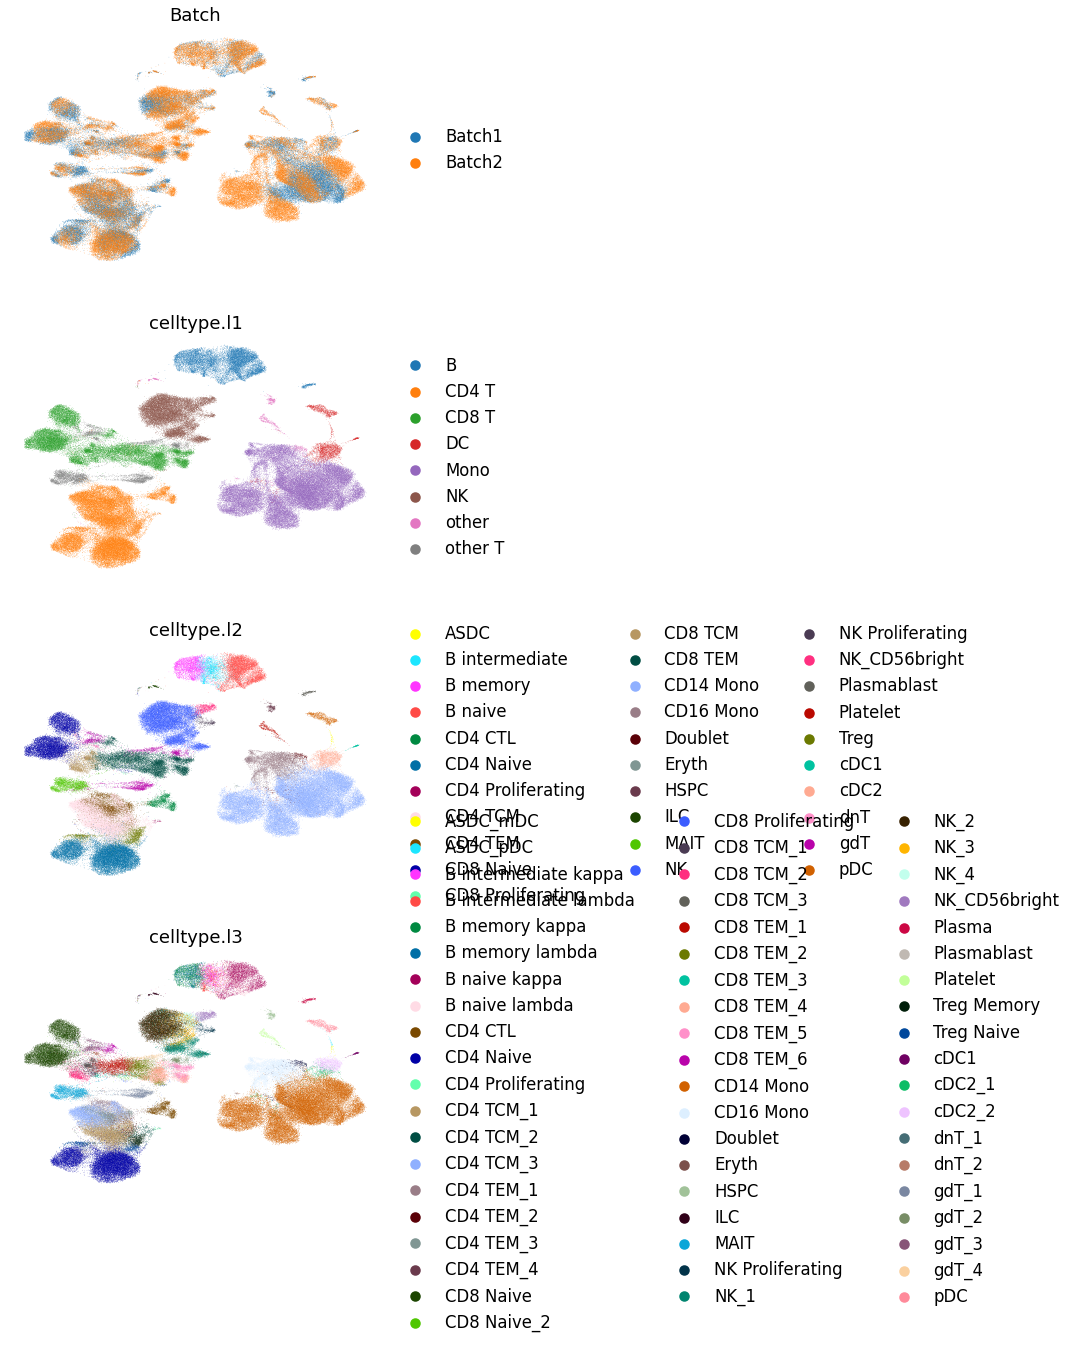

In [11]:
sc.pl.umap(adata, color=['Batch', 'celltype.l1', 'celltype.l2', 'celltype.l3'], ncols=1, frameon=False)

## scIB metrics

In [12]:
scib_anndata = sc.AnnData(adata.obsm['X_totalVI']).copy()
scib_anndata.obs = adata.obs.copy()
scib_anndata.uns['neighbors'] = adata.uns['neighbors'].copy()
scib_anndata.obsp['connectivities'] = adata.obsp['connectivities'].copy()
scib_anndata.obsp['distances'] = adata.obsp['distances'].copy()
scib_anndata.obsm['X_totalVI'] = adata.obsm['X_totalVI'].copy()

In [13]:
scib_anndata.write('hao-totalvi.h5ad')

In [14]:
metrics = scib.metrics.metrics(
    scib_anndata, 
    scib_anndata, 
    batch_key='Batch', 
    label_key='celltype.l2', 
    embed='X_totalVI',
    ari_=True,
    nmi_=True,
    silhouette_=True,
    graph_conn_=True,
    isolated_labels_asw_=True,
)
metrics

NMI...
ARI...
Silhouette score...
Isolated labels ASW...
Graph connectivity...


,0
NMI_cluster/label,0.798516
ARI_cluster/label,0.644975
ASW_label,0.567653
ASW_label/batch,0.939857
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,0.562399
graph_conn,0.980084
kBET,NaN


In [15]:
metrics.to_csv('hao_totalvi.csv')